In [71]:
import numpy as np
import csv    #加载csv包便于读取csv文件
import zipfile
import os
import json
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import datetime
import time
from datetime import timedelta

def date_2_timestamp(year,mon,day):
    tempString=str(year)+"-"+str(mon)+"-"+str(day)
    tempTime=time.strptime(tempString, "%Y-%m-%d")
    return time.mktime(tempTime)

def timestamp_2_date(un_time):
    return datetime.datetime.fromtimestamp(un_time)


def timestamp_removeDay_reduce(temp_timestamp):
    temp_date=timestamp_2_date(temp_timestamp)
    temp_timestamp=date_2_timestamp(temp_date.year,temp_date.month,1)
    return temp_timestamp

def timestamp_removeHour_reduce(temp_timestamp):
    temp_date=timestamp_2_date(temp_timestamp)
    temp_timestamp=date_2_timestamp(temp_date.year,temp_date.month,temp_date.day)
    return temp_timestamp

def timestamp_removeDay_add(temp_timestamp):
    temp_date=timestamp_2_date(temp_timestamp)
    if temp_date.month==12:
        return date_2_timestamp(temp_date.year+1,1,1)
    else:
        return date_2_timestamp(temp_date.year,temp_date.month+1,1)
    
def date_removeDay_reduce(temp_date):
    temp_timestamp=date_2_timestamp(temp_date.year,temp_date.month,1)
    return timestamp_2_date(temp_timestamp)

def date_removeHour_reduce(temp_date):
    temp_timestamp=date_2_timestamp(temp_date.year,temp_date.month,temp_date.day)
    return timestamp_2_date(temp_timestamp)

def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)

# 返回从最小到最大之间经过的时间戳，间隔为一个月
def max_min_2_timestampList(minDate,maxDate):    
    resList=[]
    resMap={}
    for single_date in daterange(minDate, maxDate):
        temp_date=date_removeDay_reduce(single_date)
        temp_timestamp=date_2_timestamp(temp_date.year,temp_date.month,temp_date.day)
        resMap[temp_timestamp]=1 

    for key in resMap.keys():
        resList.append(key)
    
    # print(resList)
    return sorted(resList)

# 返回从最小到最大之间经过的时间戳，间隔为一天

def max_min_2_timestampList_day(minDate,maxDate):    
    resList=[]
    resMap={}
    for single_date in daterange(minDate, maxDate):
        # temp_date=date_removeHour_reduce(single_date)
        temp_timestamp=date_2_timestamp(single_date.year,single_date.month,single_date.day)
        resMap[temp_timestamp]=1 

    for key in resMap.keys():
        resList.append(key)
    
    # print(resList)
    return sorted(resList)


def timestamp_2_string(temp_timestamp):
    temp_date=datetime.datetime.fromtimestamp(temp_timestamp)
    if temp_date.month<10:
        tempMonth="0"+str(temp_date.month)
    else:
        tempMonth=str(temp_date.month)
    return str(temp_date.year)+"-"+tempMonth

import calendar
def timestamp_2_string_ymd(temp_timestamp):
    temp_date=datetime.datetime.fromtimestamp(temp_timestamp)
    # if temp_date.month<10:
    #     tempMonth="0"+str(temp_date.month)
    # else:
    #     tempMonth=str(temp_date.month)
        
    tempMonth=calendar.month_abbr[int(temp_date.month)]
        
    if temp_date.day<10:
        tempDay="0"+str(temp_date.day)
    else:
        tempDay=str(temp_date.day)
    return tempMonth+"-"+tempDay+"_"+str(temp_date.year)

In [72]:
import pandas as pd
df=pd.read_csv("/mnt/sde1/geth/nft_analyse_v1/data/buySell/csv/buysell_final.csv")
# df["market"].value_counts()

# profit

In [73]:
def plotGrapty(market,shift,width):
    df=pd.read_csv("/mnt/sde1/geth/nft_analyse_v1/data/buySell/csv/buysell_final.csv")
    df=df[df["marketEdit"]!="none"]
    df=df[df["marketEdit"]!="Arcade"]
    df=df[df["marketEdit"]!="GemSwap"]
    minDate=datetime.datetime.fromtimestamp( min(df["timestamp"]) )
    maxDate=datetime.datetime.fromtimestamp( max(df["timestamp"]) )
    df=df[(df["marketEdit"]==market)]

    tx_map={}
    for index,row in df.iterrows():
        transactionHash=row["transactionHash"]
        timestamp=row["timestamp"]
        totalReward=row["revenue_dollar"]
        timestamp=timestamp_removeDay_reduce(timestamp)
        tx_map[transactionHash]={"timestamp":timestamp,"totalReward":totalReward}
        
    timestamp_map = {}
    for key,value in tx_map.items():
        timestamp=value["timestamp"]
        totalReward=value["totalReward"]
        
        if timestamp not in timestamp_map:
            timestamp_map[timestamp]=0
        timestamp_map[timestamp]+=totalReward
        
    list_key=[]
    list_value=[]

    for tempTimestamp in max_min_2_timestampList(minDate,maxDate):
        if tempTimestamp not in timestamp_map:
            timestamp_map[tempTimestamp]=0
        
        list_key.append(timestamp_2_string(tempTimestamp))
        list_value.append( timestamp_map[tempTimestamp] )
        
    # print("list_key",list_key)
    # print("list_value",list_value)


    x = np.arange(len(list_key))

    x=x + shift

    
    plt.bar( x ,  list_value, width, label=market)

{'OpenSea', 'X2Y2', 'LooksRare', 'Rarible', 'Sudoswap', 'Blur'}

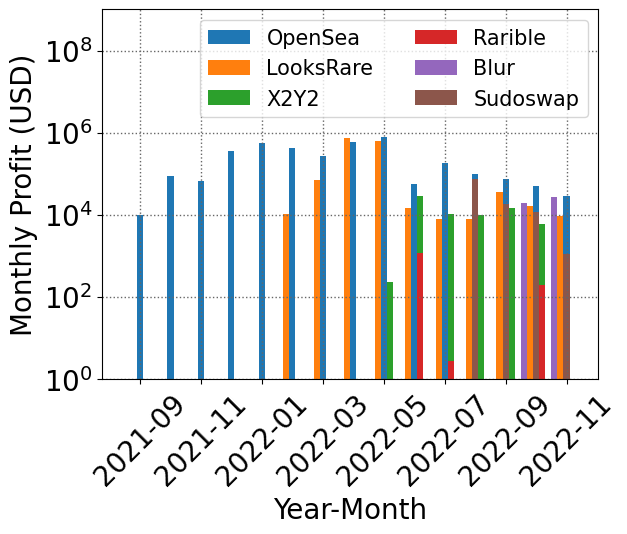

In [74]:
width=0.2

plotGrapty("OpenSea",- 0*width,width)

plotGrapty("LooksRare",-1*width,width)
plotGrapty("X2Y2", 1*width, width)
plotGrapty("Rarible",1*width,width)


plotGrapty("Blur",-2*width,width)
plotGrapty("Sudoswap",-0*width,width)



df=pd.read_csv("/mnt/sde1/geth/nft_analyse_v1/data/buySell/csv/buysell_final.csv")
df=df[df["marketEdit"]!="none"]
df=df[df["marketEdit"]!="Arcade"]
df=df[df["marketEdit"]!="GemSwap"]
minDate=datetime.datetime.fromtimestamp( min(df["timestamp"]) )
maxDate=datetime.datetime.fromtimestamp( max(df["timestamp"]) )
list_key=[]
for tempTimestamp in max_min_2_timestampList(minDate,maxDate):
    list_key.append(timestamp_2_string(tempTimestamp))

tempX=[]
tempLabel=[]
for i in range(0,len(list_key),2):
    tempX.append(i)
    tempLabel.append(list_key[i])

plt.ylim(1,1000000000)
plt.yscale('log')
plt.legend(loc=1, ncol=2, fontsize=15)
plt.xticks(tempX,labels=tempLabel,fontsize=20,rotation=45)
plt.yticks(fontsize=20)
plt.ylabel('Monthly Profit (USD)', fontsize=20)
plt.xlabel('Year-Month', fontsize=20)

plt.grid(True, color='#666666', linestyle = ":", linewidth = "1")
plt.savefig("/mnt/sde1/geth/nft_analyse_v1/data/buySell/photo/buysell_usd.pdf",bbox_inches='tight')


# number

In [75]:
def plotGrapty(market,shift,width):
    df=pd.read_csv("/mnt/sde1/geth/nft_analyse_v1/data/buySell/csv/buysell_final.csv")
    df=df[df["marketEdit"]!="none"]
    df=df[df["marketEdit"]!="Arcade"]
    df=df[df["marketEdit"]!="GemSwap"]
    minDate=datetime.datetime.fromtimestamp( min(df["timestamp"]) )
    maxDate=datetime.datetime.fromtimestamp( max(df["timestamp"]) )
    df=df[(df["marketEdit"]==market)]

    tx_map={}
    for index,row in df.iterrows():
        transactionHash=row["transactionHash"]
        timestamp=row["timestamp"]
        totalReward=1
        timestamp=timestamp_removeDay_reduce(timestamp)
        tx_map[transactionHash]={"timestamp":timestamp,"totalReward":totalReward}
        
    timestamp_map = {}
    for key,value in tx_map.items():
        timestamp=value["timestamp"]
        totalReward=value["totalReward"]
        
        if timestamp not in timestamp_map:
            timestamp_map[timestamp]=0
        timestamp_map[timestamp]+=totalReward
        
    list_key=[]
    list_value=[]

    for tempTimestamp in max_min_2_timestampList(minDate,maxDate):
        if tempTimestamp not in timestamp_map:
            timestamp_map[tempTimestamp]=0
        
        list_key.append(timestamp_2_string(tempTimestamp))
        list_value.append( timestamp_map[tempTimestamp] )
        
    # print("list_key",list_key)
    # print("list_value",list_value)


    x = np.arange(len(list_key))

    x=x + shift

    
    plt.bar( x ,  list_value, width, label=market)

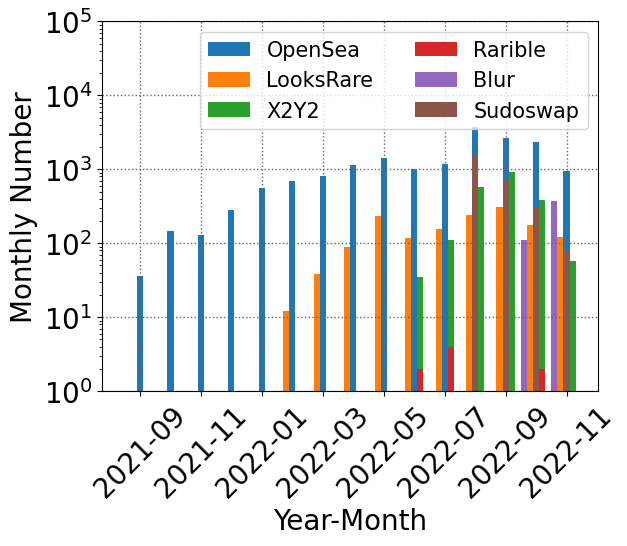

In [76]:
width=0.2

plotGrapty("OpenSea",- 0*width,width)

plotGrapty("LooksRare",-1*width,width)
plotGrapty("X2Y2", 1*width, width)
plotGrapty("Rarible",1*width,width)


plotGrapty("Blur",-2*width,width)
plotGrapty("Sudoswap",-0*width,width)



df=pd.read_csv("/mnt/sde1/geth/nft_analyse_v1/data/buySell/csv/buysell_final.csv")
df=df[df["marketEdit"]!="none"]
df=df[df["marketEdit"]!="Arcade"]
df=df[df["marketEdit"]!="GemSwap"]
minDate=datetime.datetime.fromtimestamp( min(df["timestamp"]) )
maxDate=datetime.datetime.fromtimestamp( max(df["timestamp"]) )
list_key=[]
for tempTimestamp in max_min_2_timestampList(minDate,maxDate):
    list_key.append(timestamp_2_string(tempTimestamp))

tempX=[]
tempLabel=[]
for i in range(0,len(list_key),2):
    tempX.append(i)
    tempLabel.append(list_key[i])

plt.ylim(1,100000)
plt.yscale('log')
plt.legend(loc=1, ncol=2, fontsize=15)
plt.xticks(tempX,labels=tempLabel,fontsize=20,rotation=45)
plt.yticks(fontsize=20)
plt.ylabel('Monthly Number', fontsize=20)
plt.xlabel('Year-Month', fontsize=20)

plt.grid(True, color='#666666', linestyle = ":", linewidth = "1")
plt.savefig("/mnt/sde1/geth/nft_analyse_v1/data/buySell/photo/buysell_num.pdf",bbox_inches='tight')
